In [1]:
import eleanor
import lightkurve as lk 
from IPython.display import clear_output
import pandas as pd
import numpy as np
import pickle
from os import listdir
import warnings

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
warnings.filterwarnings('ignore')
file_list = []
for files in listdir('E:/lightcurves'):
    file_list.append(int(files[:-9]))
total_targets = range(0,len(pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', header=0, usecols=['RA'],squeeze=True)))
target_list = [x for x in total_targets if x not in file_list]
print(target_list[:30])
print(len(target_list)/len(total_targets))

[195, 627, 981, 1472, 2910, 3613, 3643, 3670, 3716, 3763, 3802, 3855, 3875, 4146, 4157, 4215, 4241, 4482, 4518, 4648, 5332, 5362, 5391, 5431, 5556, 5561, 5731, 5978, 6030, 6161]
0.2540215745647237


In [ ]:
ral = pd.read_csv('F:/catalogues/final_quasar_catalogue.csv', sep=',', header=0, usecols=['RA'],squeeze=True)
decl = pd.read_csv('F:/catalogues/final_quasar_catalogue.csv', sep=',', header=0, usecols=['DEC'],squeeze=True)
terrible_targets = []

for row in target_list[10:]:
    try:
        ra = ral[row]
        dec = decl[row]

        star = eleanor.multi_sectors(sectors='all',tic=0,coords=(ra,dec),tc=True)

        full_lc = lk.LightCurve([],[])
        for observation in star:
            data = eleanor.TargetData(observation,bkg_size=15,do_pca=False)
            data.custom_aperture(shape='rectangle', h=1,w=1, method='exact')
            data.get_lightcurve()

            q = data.quality == 0

            lc = data.to_lightkurve()#flux=data.pca_flux)
            lc.flux = lc.flux - np.median(lc.flux)
            full_lc = full_lc.append(lc)

            with open('F:/sector_lightcurves/' + str(row) + '-' + str(observation.sector) + 'lc.pickle','wb') as wfile:
                pickle.dump(lc,wfile)
        with open('F:/lightcurves/' + str(row) + 'lc.pickle','wb') as wfile:
            pickle.dump(full_lc,wfile)
        clear_output()
        print("Done")
    except:
        terrible_targets.append(row)
        clear_output()
        print("Error")
        continue

In [12]:
from tess_stars2px import tess_stars2px_function_entry as tess_stars2px
result = tess_stars2px(8675309, ra, dec)
sector = result[3][result[3] < 21.5]
sectors = sector.tolist()
len(sectors)

0

In [6]:
ral = pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', header=0, usecols=['RA'],squeeze=True)
decl = pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', header=0, usecols=['DEC'],squeeze=True)
row = 1

ra = 1#ral[row]
dec = -20#decl[row]

star = eleanor.multi_sectors(sectors='all',tic=0,gaia=0,coords=(ra,dec),tc=True)

full_lc = lk.LightCurve([],[])
for observation in star:
    data = eleanor.TargetData(observation,bkg_size=15,do_pca=False)
    data.custom_aperture(shape='rectangle', h=1,w=1, method='exact')
    data.get_lightcurve()

    q = data.quality == 0

    lc = data.to_lightkurve(flux=data.raw_flux)
    print(np.median(lc.flux))
    lc.flux = lc.flux - np.median(lc.flux)
    full_lc = full_lc.append(lc)

Found star in Sector(s) 2


Set MJD-OBS to 58353.603955 from DATE-OBS.
Set MJD-END to 58380.999782 from DATE-END'. [astropy.wcs.wcs]


-122.63056895283952


-4.465250410908828

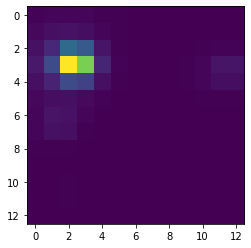

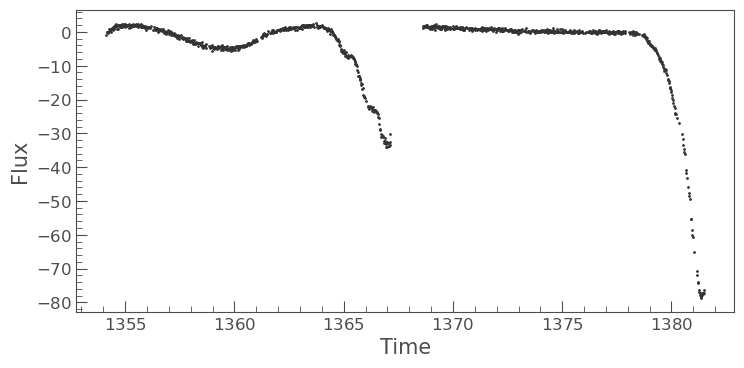

In [5]:
import matplotlib.pyplot as plt
plt.imshow(data.tpf[0])
full_lc.remove_outliers(sigma=50).scatter()
np.mean(full_lc.flux)

0.000740906700037558

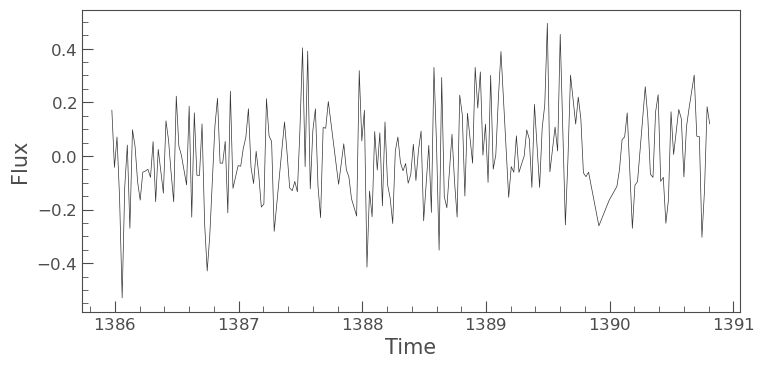

In [31]:
with open('E:/lightcurves/221lc.pickle','rb') as rfile:
    lc = pickle.load(rfile)
lc.time = lc.time[:200]
lc.flux = lc.flux[:200]
lc.plot()
np.mean(lc.flux)

(-5.0, 5.0)

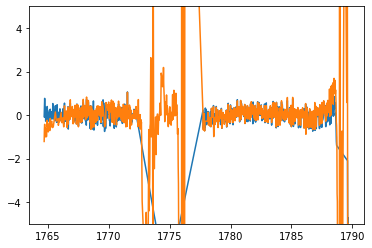

In [66]:
import matplotlib.pyplot as plt
plt.plot(lc.time,lc.flux)
plt.plot(full_lc.time,full_lc.flux)
plt.ylim(-5,5)

In [29]:
lc.show_properties()

  Attribute      Description    
------------- ------------------
         flux       array (898,)
     flux_err       array (898,)
flux_quantity       array (898,)
         time       array (898,)
    flux_unit <class 'NoneType'>
        label <class 'NoneType'>
         meta     <class 'dict'>
     targetid <class 'NoneType'>
  time_format <class 'NoneType'>
   time_scale <class 'NoneType'>


In [24]:
data.all_apertures

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0. 

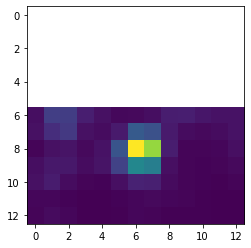

In [26]:
plt.imshow(data.tpf[0])